In [ ]:
from __future__ import division, print_function
%matplotlib inline

# Morphological operations

Morphology is the study of shapes. In image processing, some simple operations can get you a long way. The first things to learn are *erosion* and *dilation*. In erosion, we look at a pixel’s local neighborhood and replace the value of that pixel with the minimum value of that neighborhood. In dilation, we instead choose the maximum.

In [1]:
import numpy as np
from matplotlib import pyplot as plt, cm
import skdemo
plt.rcParams['image.cmap'] = 'cubehelix'
plt.rcParams['image.interpolation'] = 'none'

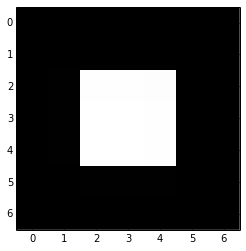

In [2]:
image = np.array([[0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0]], dtype=np.uint8)
plt.imshow(image)

The documentation for scikit-image's morphology module is
[here](http://scikit-image.org/docs/0.10.x/api/skimage.morphology.html).

Importantly, we must use a *structuring element*, which defines the local
neighborhood of each pixel. To get every neighbor (up, down, left, right, and
diagonals), use `morphology.square`; to avoid diagonals, use
`morphology.diamond`:

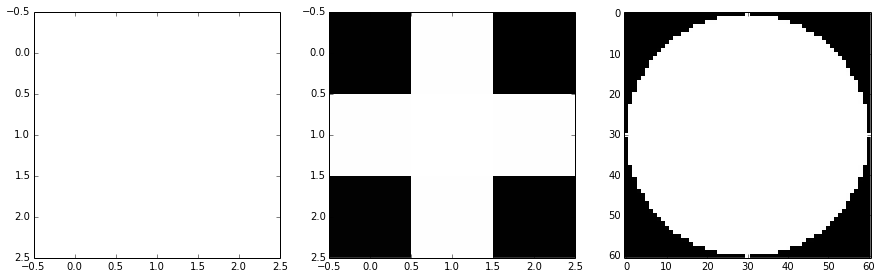

In [3]:
from skimage import morphology
sq = morphology.square(width=3)
dia = morphology.diamond(radius=1)
disk = morphology.disk(radius=30)
skdemo.imshow_all(sq, dia, disk)

The central value of the structuring element represents the pixel being considered, and the surrounding values are the neighbors: a 1 value means that pixel counts as a neighbor, while a 0 value does not. So:

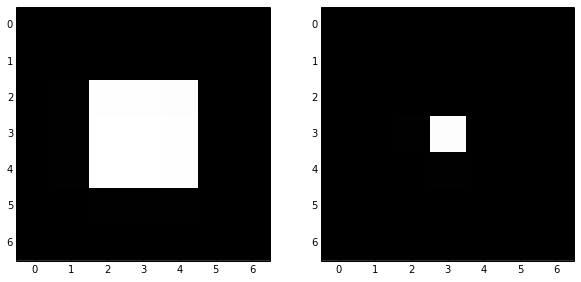

In [4]:
skdemo.imshow_all(image, morphology.erosion(image, sq), shape=(1, 2))

and

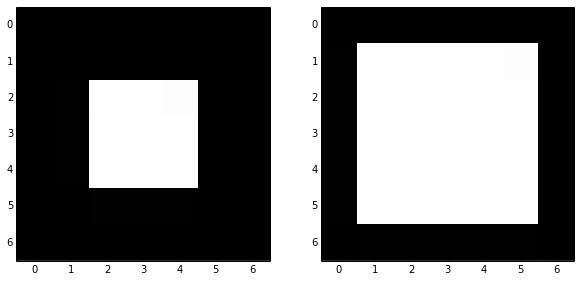

In [5]:
skdemo.imshow_all(image, morphology.dilation(image, sq))

and

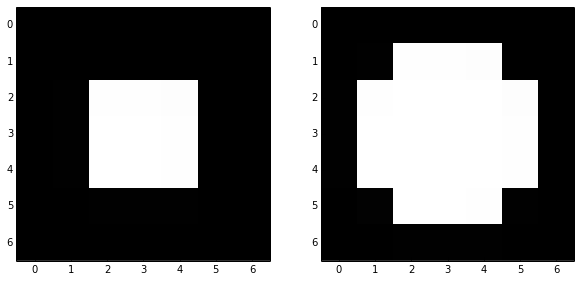

In [6]:
skdemo.imshow_all(image, morphology.dilation(image, dia))

Erosion and dilation can be combined into two slightly more sophisticated operations, *opening* and *closing*. Here's an example:

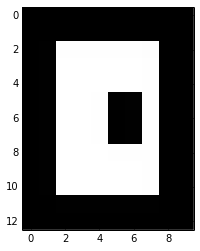

In [7]:
image = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], np.uint8)
plt.imshow(image)

What happens when run an erosion followed by a dilation of this image?

What about the reverse?

Try to imagine the operations in your head before trying them out below.

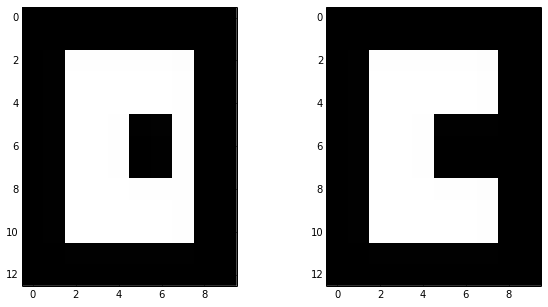

In [8]:
skdemo.imshow_all(image, morphology.opening(image, sq)) # erosion -> dilation

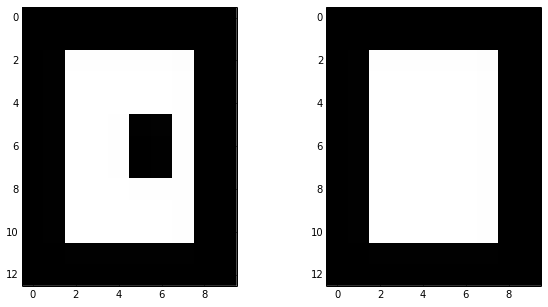

In [9]:
skdemo.imshow_all(image, morphology.closing(image, sq)) # dilation -> erosion

**Exercise**: use morphological operations to remove noise from a binary image.

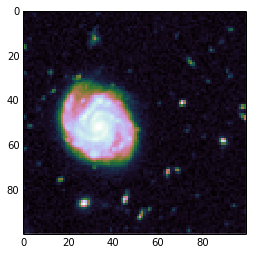

In [10]:
from skimage import data, color
hub = color.rgb2gray(data.hubble_deep_field()[350:450, 90:190])
plt.imshow(hub)

Remove the smaller objects to retrieve the large galaxy.

/Users/nuneziglesiasj/anaconda/lib/python2.7/site-packages/scikit_image-0.11dev-py2.7-macosx-10.5-x86_64.egg/skimage/util/dtype.py:107: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


(<matplotlib.axes.AxesSubplot at 0x1096b59d0>,
 <matplotlib.axes.AxesSubplot at 0x109358b10>)

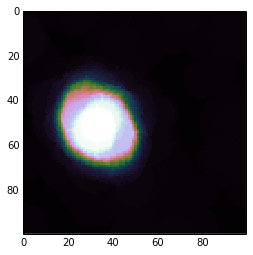

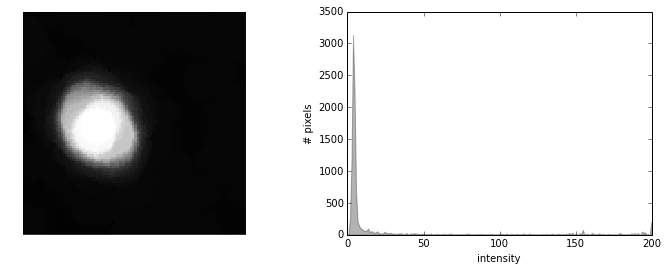

In [11]:
disk = morphology.disk(radius=8)
gal = morphology.opening(hub, disk)
plt.imshow(gal)
skdemo.imshow_with_histogram(gal)

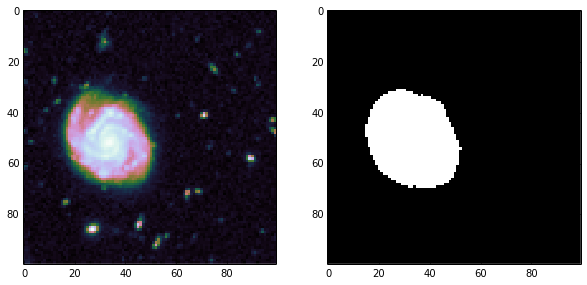

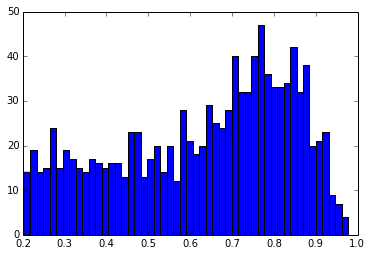

In [12]:
gal_selector = gal > 50
# use numpy boolean indexing to estimate histogram
# of brightness intensity on isolated galaxy
skdemo.imshow_all(hub, gal_selector)
f = plt.figure()
plt.hist(hub[gal_selector], bins=50);